In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

# Load Train Dataset

In [2]:
train_df = pd.read_excel("Train Data.xlsx_fare")
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Load Test Data

In [3]:
test_df = pd.read_excel("Test_Data.xlsx_fare")
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# check Nan values in train dataset

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Similarly check NaN values in test dataset

test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [7]:
# Only Two NAN Values are in Train_df , so drop these.

train_df = train_df.dropna()
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
# After droping Check NAN again

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA
Date_of_Journey,Dep_Time,Arrival_Time columns are object column as mention in Dataset information, Therefore we have to convert these datatype into Timestamp

In [9]:
train_df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [10]:
#Extract Day from Date_of_Journey Column

train_df['Journey_Day'] = pd.to_datetime(train_df.Date_of_Journey , format = "%d/%m/%Y").dt.day

#Extract Month from Date_of_Journey Column

train_df["Journey_Month"] = pd.to_datetime(train_df.Date_of_Journey , format = "%d/%m/%Y").dt.month

#Now Drop Date_of_Journey column

train_df = train_df.drop(["Date_of_Journey"],axis=1)
train_df

C:\Users\kashi\AppData\Local\Temp/ipykernel_8768/76428539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Journey_Day'] = pd.to_datetime(train_df.Date_of_Journey , format = "%d/%m/%Y").dt.day
C:\Users\kashi\AppData\Local\Temp/ipykernel_8768/76428539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Journey_Month"] = pd.to_datetime(train_df.Date_of_Journey , format = "%d/%m/%Y").dt.month


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [11]:
# similrly apply on test dataset
# Extract Day from Date_of_Journey Column

test_df["Journey_Day"] = pd.to_datetime(test_df.Date_of_Journey , format="%d/%m/%Y").dt.day

#Extract Month from Date_of_Journey Column

test_df["Journey_Month"] = pd.to_datetime(test_df.Date_of_Journey , format="%d/%m/%Y").dt.month

#Now Drop Date_of_Journey column

test_df = test_df.drop(["Date_of_Journey"],axis=1)
test_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


In [12]:
#check How many unique values are in Journey_Month

train_df["Journey_Month"].unique()

array([3, 5, 6, 4], dtype=int64)

In [13]:
# similarly check in test dataset
#check How many unique values are in Journey_Month

test_df["Journey_Month"].unique()

array([6, 5, 3, 4], dtype=int64)

This Data contain records of MARCH, APRIL, MAY, JUNE (2019), so no need to handle Year.

In [14]:
#Extract Hour from Dep_Time Column

train_df["Dep_hour"] = pd.to_datetime(train_df.Dep_Time ).dt.hour

#Extract Minutes from Dep_Time Column
train_df["Dep_min"] = pd.to_datetime(train_df.Dep_Time ).dt.minute

#Now Drop Dep_Time column
train_df = train_df.drop(["Dep_Time"],axis=1)
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [15]:
#Similarly apply in test dataset
#Extract Hour from Dep_Time Column

test_df["Dep_hour"] = pd.to_datetime(test_df.Dep_Time ).dt.hour

#Extract Minutes from Dep_Time Column
test_df["Dep_min"] = pd.to_datetime(test_df.Dep_Time ).dt.minute

#Now Drop Dep_Time column
test_df = test_df.drop(["Dep_Time"],axis=1)
test_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,3,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,3,4,0


In [16]:
#Extract Hour from Arrival_Time Column
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time ).dt.hour

#Extract Minutes from Arrival_Time Column
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time ).dt.minute

#Now Drop Arrival_Time column
train_df = train_df.drop(["Arrival_Time"],axis=1)
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [17]:
#Similarly apply in test dataset

#Extract Hour from Arrival_Time Column
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time ).dt.hour

#Extract Minutes from Arrival_Time Column
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time ).dt.minute

#Now Drop Arrival_Time column
test_df = test_df.drop(["Arrival_Time"],axis=1)
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


In [18]:
# Duration is difference between Departure Time and Arrival Time. and Duration column is Object , so we have to change into Timestamp.



duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

    
duration_hour = []
duration_minutes = []


for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))                   ## Extract hours from Duration column
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))    ## Extract min from Duration column

In [19]:
#Adding duration_hour and  duration_minutes in train_df.

train_df["Duration_hour"] = duration_hour
train_df["Duration_minutes"] = duration_minutes

In [20]:
# Duration is difference between Departure Time and Arrival Time. and Duration column is Object , so we have to change into Timestamp.
#similarly apply in test dataset


duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

    
duration_hour = []
duration_minutes = []


for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))                   ## Extract hours from Duration column
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))    ## Extract hours from Duration column

In [21]:
#Adding duration_hour and  duration_minutes in test_df.

test_df["Duration_hour"] = duration_hour
test_df["Duration_minutes"] = duration_minutes

In [22]:
#Now Drop Duration column from train_df
train_df = train_df.drop(["Duration"],axis=1)

#Now Drop Duration column from test_df
test_df = test_df.drop(["Duration"],axis=1)


# Handle Categorical Columns

Airline

In [23]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

C:\Users\kashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Trujet'),
  Text(8, 0, 'Multiple carriers'),
  Text(9, 0, 'Vistara Premium economy'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Jet Airways Business')])

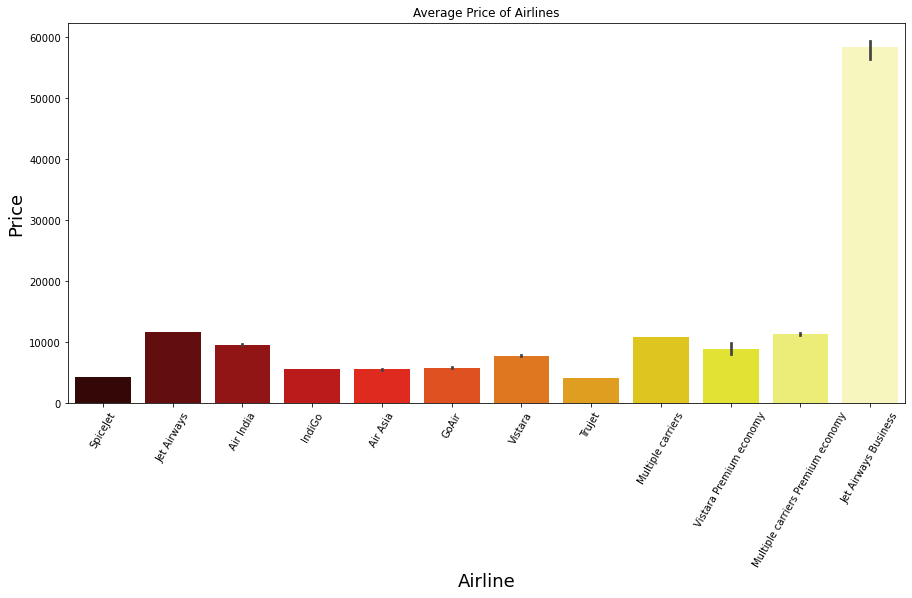

In [24]:
#Average Price for all Airline's

plt.figure(figsize=(15,7))
sns.barplot("Airline", y = "Price",data=train_df.sort_values("Price"),palette="hot",ci=30,estimator=np.mean)
plt.title("Average Price of Airlines")
plt.xlabel("Airline" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

C:\Users\kashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

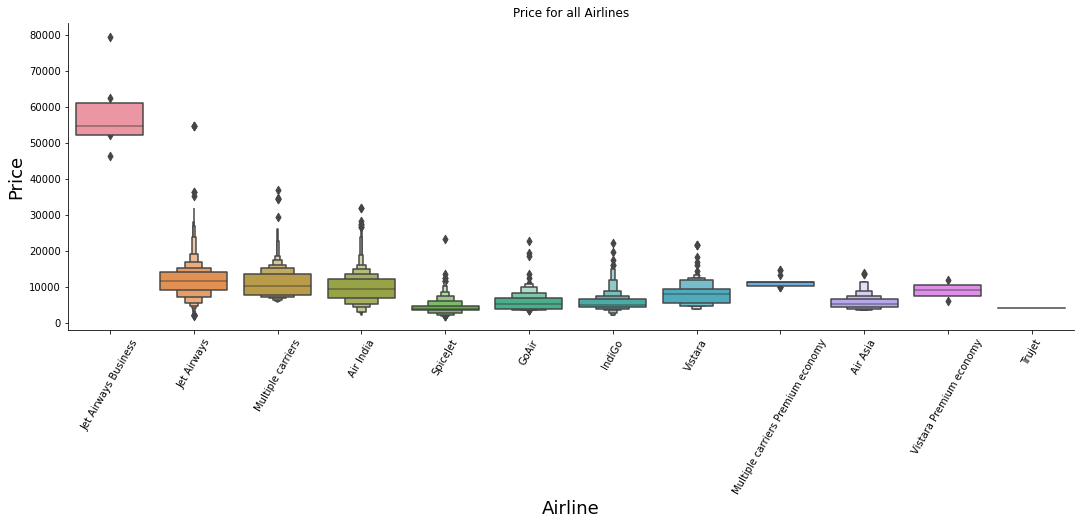

In [25]:
# Price for all Airline's

plt.figure(figsize=(15,10))
sns.catplot("Airline", y = "Price",data=train_df.sort_values("Price",ascending=False),kind="boxen",ci=30,aspect=3)
plt.title("Price for all Airlines")
plt.xlabel("Airline" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)
plt.show()

# catplot like boxplot

Source

In [26]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [27]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Banglore'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi')])

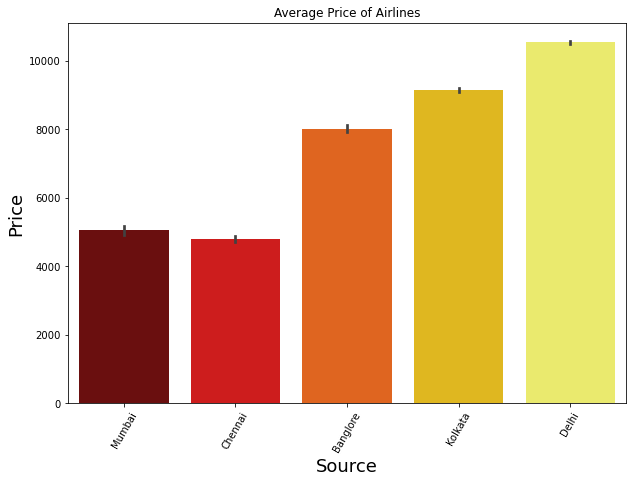

In [28]:
#Average Price for all Source

plt.figure(figsize=(10,7))
sns.barplot(x = "Source", y = "Price",data=train_df.sort_values("Price"),palette="hot",ci=60,estimator=np.mean)
plt.title("Average Price of Airlines")
plt.xlabel("Source" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

<Figure size 1080x720 with 0 Axes>

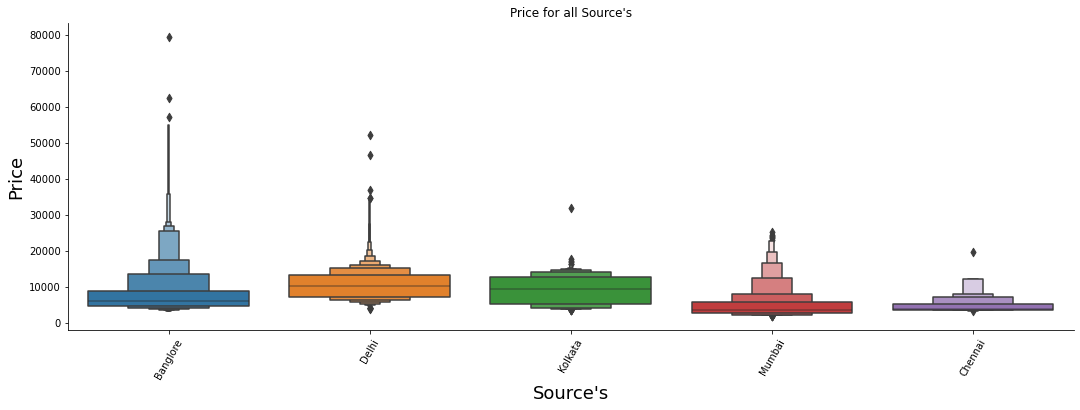

In [29]:
# Price for all Source's

plt.figure(figsize=(15,10))
sns.catplot(x="Source", y = "Price",data=train_df.sort_values("Price",ascending=False),kind="boxen",ci=30,aspect=3)
plt.title("Price for all Source's")
plt.xlabel("Source's" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)
plt.show()


# catplot like boxplot

Destination

In [30]:
train_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [31]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
#New Delhi and Delhi both are same so New Delhi change by Delhi.
train_df.loc[train_df["Destination"]=="New Delhi","Destination"] = "Delhi"

# similarly apply on test_df 
test_df.loc[test_df["Destination"]=="New Delhi","Destination"] = "Delhi"

#Check again unique Values
train_df["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [33]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Banglore'),
  Text(4, 0, 'Cochin')])

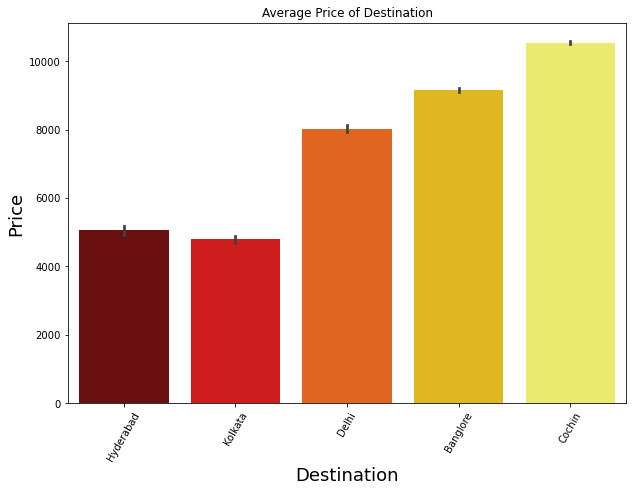

In [34]:
#Average Price for all Source

plt.figure(figsize=(10,7))
sns.barplot(x = "Destination", y = "Price",data=train_df.sort_values("Price"),palette="hot",ci=60,estimator=np.mean)
plt.title("Average Price of Destination")
plt.xlabel("Destination" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

<Figure size 1080x720 with 0 Axes>

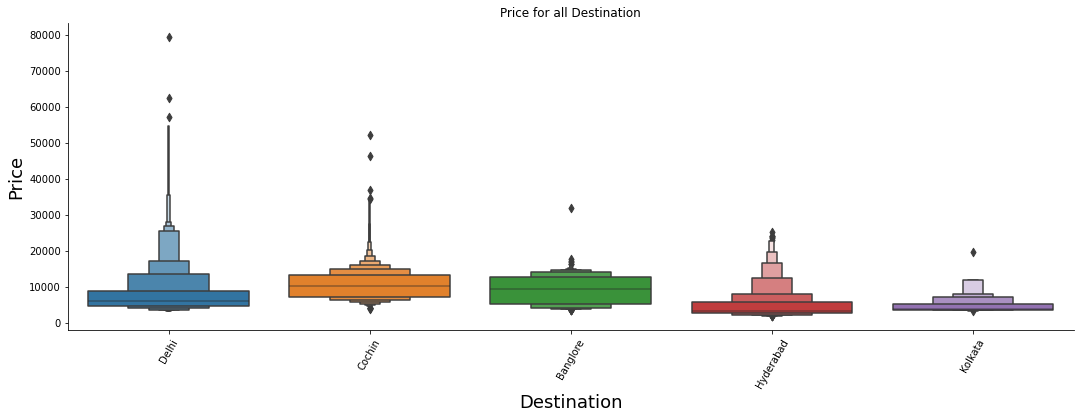

In [35]:
# Price for all Destination's

plt.figure(figsize=(15,10))
sns.catplot(x="Destination", y = "Price",data=train_df.sort_values("Price",ascending=False),kind="boxen",ci=30,aspect=3)
plt.title("Price for all Destination")
plt.xlabel("Destination" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)
plt.show()


# catplot like boxplot

In [36]:
train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


C:\Users\kashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price of ticket')

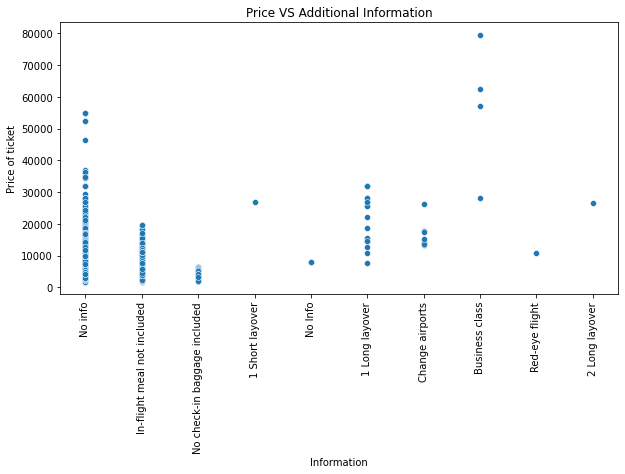

In [37]:
plt.figure(figsize = (10,5))
plt.title('Price VS Additional Information')
sns.scatterplot(train_df['Additional_Info'], train_df['Price'],data=train_df)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that the ticket prices for Business class is higher.

In [38]:
train_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
train_df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [40]:
#Additional_Info Feature has more than 78% (no info) value , thus drop Additional_Info feature

train_df = train_df.drop(["Additional_Info"],axis=1)
test_df = test_df.drop(["Additional_Info"],axis=1)

In [41]:
print(train_df["Route"].unique())

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [42]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
# Route and Total_Stops having same Information so Drop one column 

train_df = train_df.drop(["Route"],axis=1)
train_df

test_df = test_df.drop(["Route"],axis=1)
test_df


,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,15,15


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '1 stop'),
  Text(2, 0, '2 stops'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

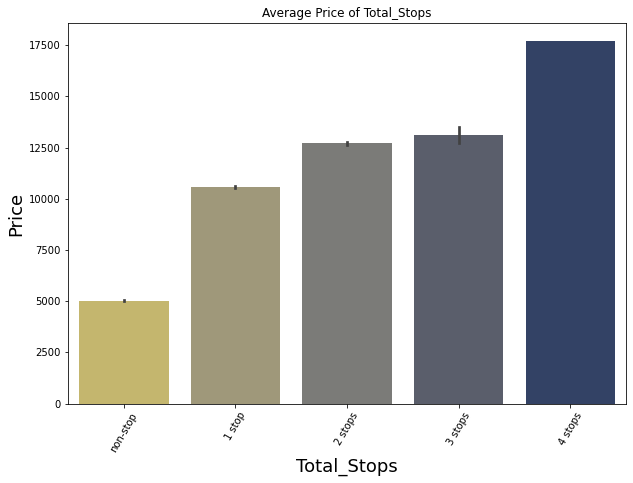

In [44]:
#Average Price for all Total_Stops

plt.figure(figsize=(10,7))
sns.barplot(x = "Total_Stops", y = "Price",data=train_df.sort_values("Price"),palette="cividis_r",ci=60,estimator=np.mean)
plt.title("Average Price of Total_Stops")
plt.xlabel("Total_Stops" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

Total_Stops having a Ordinal Values so change it into ordinal categorey.and cleared from Graph as number of stops increases price also increases.

In [45]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hour', 'Duration_minutes'],
      dtype='object')

In [46]:
test_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_Day',
       'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hour', 'Duration_minutes'],
      dtype='object')

In [47]:
ordinal_values = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

# train_df
train_df["Total_Stops"] = train_df["Total_Stops"].map(ordinal_values)
train_df

# test_df
test_df["Total_Stops"] = test_df["Total_Stops"].map(ordinal_values)
test_df

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1,6,3,4,0,19,15,15,15


In [48]:
# Airline,Source,Destination Features are Nominal categorey so change into dummies varialbes.

train_dummy_df = pd.get_dummies(train_df,drop_first=True)


test_dummy_df = pd.get_dummies(test_df,drop_first=True)

In [49]:
train_dummy_df

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [50]:
test_dummy_df

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


C:\Users\kashi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

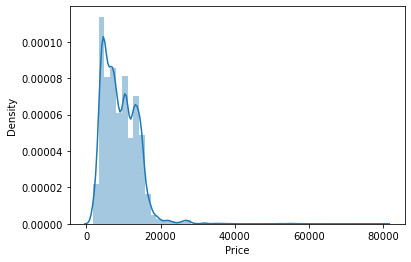

In [51]:
#Distribution of Price(Target) Feature

sns.distplot(train_df["Price"])

In [52]:
#Split Independent and Dependent Features

x_df = train_dummy_df.drop(["Price"],axis=1)

y_df = train_dummy_df["Price"]
x_df

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [53]:
#Taking all continuous features for checking correlation between these features.
x_df_continuous = x_df[["Journey_Day","Journey_Month","Dep_hour","Dep_min",
                        "Arrival_hour","Arrival_min","Duration_hour","Duration_minutes"]]
x_df_continuous

,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,24,3,22,20,1,10,2,50
1,1,5,5,50,13,15,7,25
2,9,6,9,25,4,25,19,0
3,12,5,18,5,23,30,5,25
4,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,2,30
10679,27,4,20,45,23,20,2,35
10680,27,4,8,20,11,20,3,0
10681,1,3,11,30,14,10,2,40


# Feature Selection

check correlation between continuous features

<AxesSubplot:>

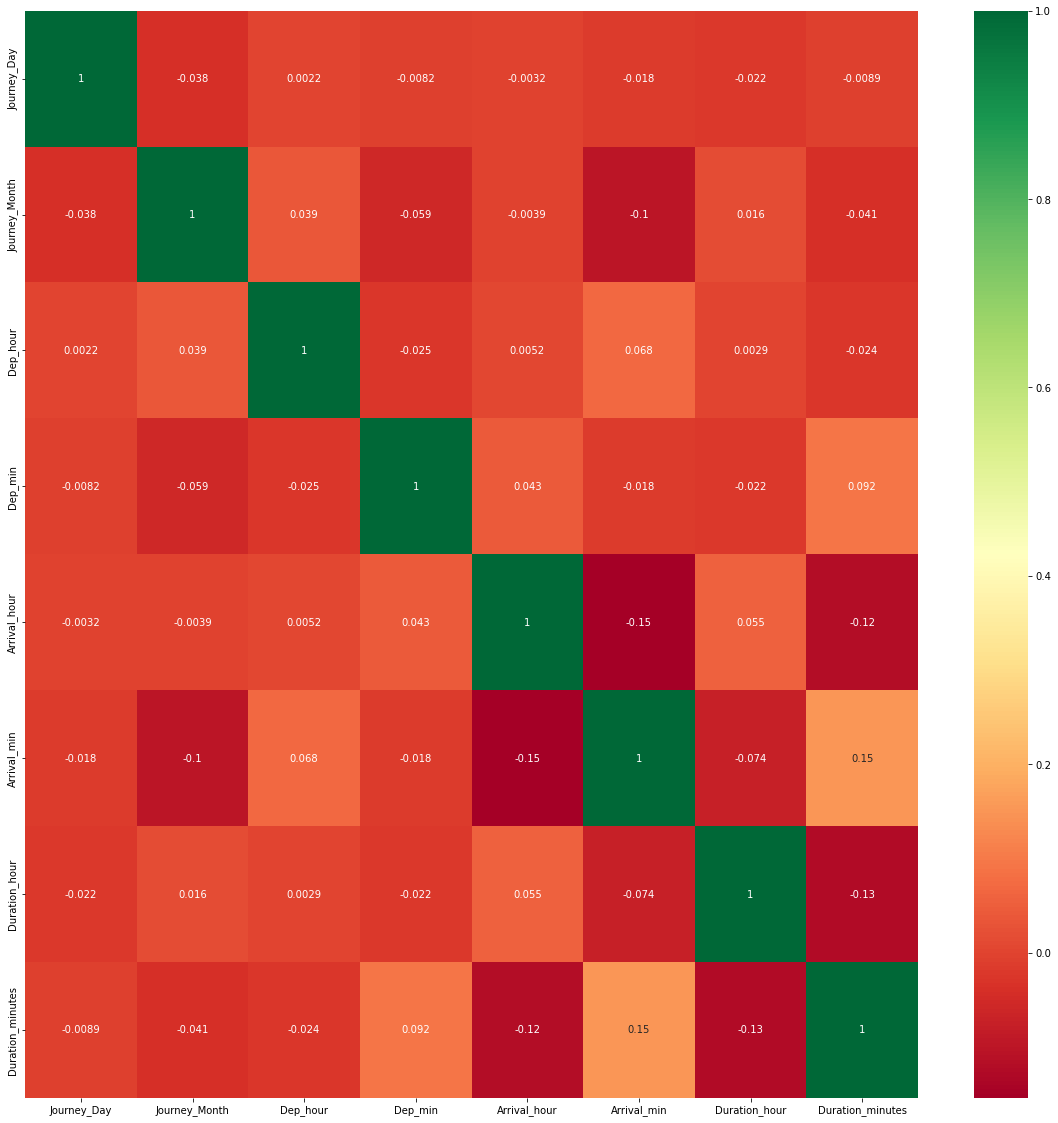

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(x_df_continuous.corr(),annot=True,cmap="RdYlGn")

In [55]:
corr_col = []
corr_matrix = x_df_continuous.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.8:
            col_name=corr_matrix.columns[i]
            corr_col.append(col_name)
print(corr_col)

[]


## Important Features
from sklearn.feature_selection import SelectFromModel from sklearn.linear_model import Lasso

selection = SelectFromModel(Lasso()) selection.fit(x_df,y_df)

feature_name = x_df.columns[selection.get_support()] feature_name

new_x_df = selection.transform(x_df) new_x_df

new_x_df = pd.DataFrame(new_x_df,columns=feature_name) new_x_df

test_df = test_dummy_df[new_x_df.columns] test_df

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

In [57]:
model = ExtraTreesRegressor()
model.fit(x_df,y_df)

ExtraTreesRegressor()

<AxesSubplot:>

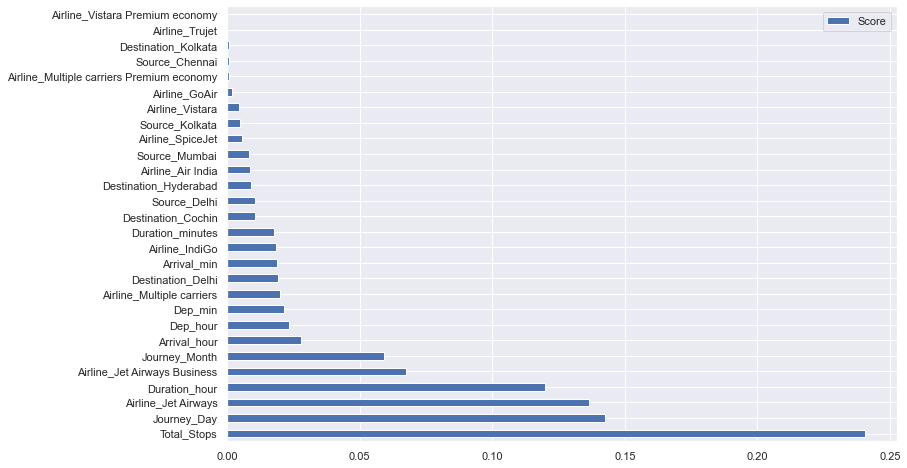

In [58]:
tree_score = pd.DataFrame(model.feature_importances_,index=x_df.columns ,columns=["Score"])
tree_sort = tree_score.sort_values("Score",ascending=False)
sns.set(style="darkgrid")
tree_sort.plot(kind="barh",figsize=(12,8))

Select top 20 Features

In [60]:
top_20_features = tree_score.sort_values("Score",ascending=False).head(20)
top_20_features.index

Index(['Total_Stops', 'Journey_Day', 'Airline_Jet Airways', 'Duration_hour',
       'Airline_Jet Airways Business', 'Journey_Month', 'Arrival_hour',
       'Dep_hour', 'Dep_min', 'Airline_Multiple carriers', 'Destination_Delhi',
       'Arrival_min', 'Airline_IndiGo', 'Duration_minutes',
       'Destination_Cochin', 'Source_Delhi', 'Destination_Hyderabad',
       'Airline_Air India', 'Source_Mumbai', 'Airline_SpiceJet'],
      dtype='object')

In [61]:
new_x_df = x_df[top_20_features.index]
new_x_df


,Total_Stops,Journey_Day,Airline_Jet Airways,Duration_hour,Airline_Jet Airways Business,Journey_Month,Arrival_hour,Dep_hour,Dep_min,Airline_Multiple carriers,Destination_Delhi,Arrival_min,Airline_IndiGo,Duration_minutes,Destination_Cochin,Source_Delhi,Destination_Hyderabad,Airline_Air India,Source_Mumbai,Airline_SpiceJet
0,0,24,0,2,0,3,1,22,20,0,1,10,1,50,0,0,0,0,0,0
1,2,1,0,7,0,5,13,5,50,0,0,15,0,25,0,0,0,1,0,0
2,2,9,1,19,0,6,4,9,25,0,0,25,0,0,1,1,0,0,0,0
3,1,12,0,5,0,5,23,18,5,0,0,30,1,25,0,0,0,0,0,0
4,1,1,0,4,0,3,21,16,50,0,1,35,1,45,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,0,2,0,4,22,19,55,0,0,25,0,30,0,0,0,0,0,0
10679,0,27,0,2,0,4,23,20,45,0,0,20,0,35,0,0,0,1,0,0
10680,0,27,1,3,0,4,11,8,20,0,1,20,0,0,0,0,0,0,0,0
10681,0,1,0,2,0,3,14,11,30,0,1,10,0,40,0,0,0,0,0,0


In [62]:
test_df = test_dummy_df[new_x_df.columns]
test_df

,Total_Stops,Journey_Day,Airline_Jet Airways,Duration_hour,Airline_Jet Airways Business,Journey_Month,Arrival_hour,Dep_hour,Dep_min,Airline_Multiple carriers,Destination_Delhi,Arrival_min,Airline_IndiGo,Duration_minutes,Destination_Cochin,Source_Delhi,Destination_Hyderabad,Airline_Air India,Source_Mumbai,Airline_SpiceJet
0,1,6,1,10,0,6,4,17,30,0,0,25,0,55,1,1,0,0,0,0
1,1,12,0,4,0,5,10,6,20,0,0,20,1,0,0,0,0,0,0,0
2,1,21,1,23,0,5,19,19,15,0,0,0,0,45,1,1,0,0,0,0
3,1,21,0,13,0,5,21,8,0,1,0,0,0,0,1,1,0,0,0,0
4,0,24,0,2,0,6,2,23,55,0,1,45,0,50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,0,23,0,6,20,20,30,0,0,25,0,55,0,0,0,1,0,0
2667,0,27,0,2,0,3,16,14,20,0,0,55,1,35,0,0,0,0,0,0
2668,1,6,1,6,0,3,4,21,50,0,0,25,0,35,1,1,0,0,0,0
2669,1,6,0,15,0,3,19,4,0,0,0,15,0,15,1,1,0,1,0,0


# Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaling = StandardScaler()
scaling_data = scaling.fit_transform(new_x_df,y_df)

In [69]:
new_x_df = pd.DataFrame(scaling_data,columns=new_x_df.columns)
new_x_df

,Total_Stops,Journey_Day,Airline_Jet Airways,Duration_hour,Airline_Jet Airways Business,Journey_Month,Arrival_hour,Dep_hour,Dep_min,Airline_Multiple carriers,Destination_Delhi,Arrival_min,Airline_IndiGo,Duration_minutes,Destination_Cochin,Source_Delhi,Destination_Hyderabad,Airline_Air India,Source_Mumbai,Airline_SpiceJet
0,-1.220666,1.237288,-0.750530,-0.970614,-0.023707,-1.467402,-1.800436,1.654154,-0.234950,-0.355078,1.965219,-0.890014,2.050151,1.279041,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
1,1.741432,-1.475307,-0.750530,-0.381999,-0.023707,0.250289,-0.050909,-1.303113,1.363607,-0.355078,-0.508849,-0.587094,-0.487769,-0.196319,-0.859093,-0.859093,-0.264206,2.258432,-0.264206,-0.287972
2,1.741432,-0.531796,1.332391,1.030677,-0.023707,1.109135,-1.363054,-0.607286,0.031476,-0.355078,-0.508849,0.018745,-0.487769,-1.671678,1.164018,1.164018,-0.264206,-0.442785,-0.264206,-0.287972
3,0.260383,-0.177979,-0.750530,-0.617445,-0.023707,0.250289,1.407030,0.958326,-1.034229,-0.355078,-0.508849,0.321664,2.050151,-0.196319,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
4,0.260383,-1.475307,-0.750530,-0.735168,-0.023707,-1.467402,1.115442,0.610412,1.363607,-0.355078,1.965219,0.624584,2.050151,0.983969,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.220666,-0.531796,-0.750530,-0.970614,-0.023707,-0.608557,1.261236,1.132283,1.630034,-0.355078,-0.508849,0.018745,-0.487769,0.098753,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
10678,-1.220666,1.591104,-0.750530,-0.970614,-0.023707,-0.608557,1.407030,1.306240,1.097181,-0.355078,-0.508849,-0.284175,-0.487769,0.393825,-0.859093,-0.859093,-0.264206,2.258432,-0.264206,-0.287972
10679,-1.220666,1.591104,1.332391,-0.852891,-0.023707,-0.608557,-0.342497,-0.781243,-0.234950,-0.355078,1.965219,-0.284175,-0.487769,-1.671678,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
10680,-1.220666,-1.475307,-0.750530,-0.970614,-0.023707,-1.467402,0.094885,-0.259372,0.297903,-0.355078,1.965219,-0.890014,-0.487769,0.688897,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972


In [70]:
# Apply scaling on test dataset

test_scaling = scaling.transform(test_df)

test_df = pd.DataFrame(test_scaling,columns=test_df.columns)
test_df

,Total_Stops,Journey_Day,Airline_Jet Airways,Duration_hour,Airline_Jet Airways Business,Journey_Month,Arrival_hour,Dep_hour,Dep_min,Airline_Multiple carriers,Destination_Delhi,Arrival_min,Airline_IndiGo,Duration_minutes,Destination_Cochin,Source_Delhi,Destination_Hyderabad,Airline_Air India,Source_Mumbai,Airline_SpiceJet
0,0.260383,-0.885613,1.332391,-0.028830,-0.023707,1.109135,-1.363054,0.784369,0.297903,-0.355078,-0.508849,0.018745,-0.487769,1.574113,1.164018,1.164018,-0.264206,-0.442785,-0.264206,-0.287972
1,0.260383,-0.177979,-0.750530,-0.735168,-0.023707,0.250289,-0.488291,-1.129156,-0.234950,-0.355078,-0.508849,-0.284175,2.050151,-1.671678,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
2,0.260383,0.883471,1.332391,1.501569,-0.023707,0.250289,0.823854,1.132283,-0.501376,-0.355078,-0.508849,-1.495853,-0.487769,0.983969,1.164018,1.164018,-0.264206,-0.442785,-0.264206,-0.287972
3,0.260383,0.883471,-0.750530,0.324339,-0.023707,0.250289,1.115442,-0.781243,-1.300655,2.816281,-0.508849,-1.495853,-0.487769,-1.671678,1.164018,1.164018,-0.264206,-0.442785,-0.264206,-0.287972
4,-1.220666,1.237288,-0.750530,-0.970614,-0.023707,1.109135,-1.654642,1.828111,1.630034,-0.355078,1.965219,1.230423,-0.487769,1.279041,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.260383,-0.885613,-0.750530,1.501569,-0.023707,1.109135,0.969648,1.306240,0.297903,-0.355078,-0.508849,0.018745,-0.487769,1.574113,-0.859093,-0.859093,-0.264206,2.258432,-0.264206,-0.287972
2667,-1.220666,1.591104,-0.750530,-0.970614,-0.023707,-1.467402,0.386473,0.262499,-0.234950,-0.355078,-0.508849,1.836262,2.050151,0.393825,-0.859093,-0.859093,-0.264206,-0.442785,-0.264206,-0.287972
2668,0.260383,-0.885613,1.332391,-0.499722,-0.023707,-1.467402,-1.363054,1.480197,1.363607,-0.355078,-0.508849,0.018745,-0.487769,0.393825,1.164018,1.164018,-0.264206,-0.442785,-0.264206,-0.287972
2669,0.260383,-0.885613,-0.750530,0.559785,-0.023707,-1.467402,0.823854,-1.477070,-1.300655,-0.355078,-0.508849,-0.587094,-0.487769,-0.786462,1.164018,1.164018,-0.264206,2.258432,-0.264206,-0.287972


In [71]:
#Split Train_Dataset and Test_Dataset 
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(new_x_df,y_df,test_size=0.25,random_state=0)

#### Model Building by GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [75]:
gb_model.score(x_train,y_train)

0.78366288944483

In [76]:
# Prediction on Test Dataset

gb_prediction = gb_model.predict(x_test)
gb_prediction

array([12226.27827387,  6347.98415968,  4451.07158721, ...,
        9700.02744807,  6827.68569875,  8878.34287971])

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [79]:
print("MAE:",mean_absolute_error(y_test,gb_prediction))
print("MSE:",mean_squared_error(y_test,gb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_test,gb_prediction)))

MAE: 1578.7817315791397
MSE: 5597079.749694939
RMSE: 2365.814817287046


# Randomized Search CV

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
gb_model = GradientBoostingRegressor()

In [82]:
param_dist = {"n_estimators":[50,80,100,200,300,400,500],
              "max_depth":[3,5,7,9,10,12,15],"min_samples_leaf":[1,3,5,7],
               "min_samples_split" : [3,5,8,10,12],
             "learning_rate":[0.01,0.1,0.3,0.5,0.7]}
                     
rdm_search = RandomizedSearchCV(gb_model,param_distributions=param_dist,n_jobs=-1 , n_iter=30,cv=10,verbose=5)
rdm_search.fit(new_x_df,y_df)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3, 0.5,
                                                          0.7],
                                        'max_depth': [3, 5, 7, 9, 10, 12, 15],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [3, 5, 8, 10, 12],
                                        'n_estimators': [50, 80, 100, 200, 300,
                                                         400, 500]},
                   verbose=5)

In [87]:
rdm_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'learning_rate': 0.1}

In [88]:
rdm_search.best_score_

0.8387457781230356

In [89]:
#Prediction on Test Dataset
rdm_gb_prediction = rdm_search.predict(x_test)
rdm_gb_prediction

array([12578.27439335,  6062.61281837,  3664.34891781, ...,
        8579.10034317,  6162.25069404,  7354.35200544])

In [92]:
r2_score(y_test,rdm_gb_prediction)

0.9226796762997371

In [94]:
print("MAE:",mean_absolute_error(y_test,rdm_gb_prediction))
print("MSE:",mean_squared_error(y_test,rdm_gb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_gb_prediction)))

MAE: 881.7873572966639
MSE: 1744291.9117371615
RMSE: 1320.7164388078015


In [95]:
import pickle

In [96]:
pickle_out = open("gb_model_25.pickle","wb")
pickle.dump(rdm_search,pickle_out)

# Prediction Test Dataset

In [97]:
test_prediction = rdm_search.predict(test_df)